In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from tabulate import tabulate

In [2]:
#Read dataframe

df = pd.read_csv('toxity_per_attribute.csv')

In [3]:
#View CSV
df

,Wiki_ID,TOXICITY,lesbian,gay,bisexual,transgender,trans,queer,lgbt,lgbtq,...,older,young,younger,teenage,millenial,middle aged,elderly,blind,deaf,paralyzed
0,0,0.096492,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,0.017991,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,0.150298,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,0.065861,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4,0.667166,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76559,76559,0.341937,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
76560,76560,0.959019,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
76561,76561,0.026080,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
76562,76562,0.967042,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [4]:
#View details about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76564 entries, 0 to 76563
Data columns (total 52 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Wiki_ID           76564 non-null  int64  
 1   TOXICITY          76564 non-null  float64
 2   lesbian           76564 non-null  bool   
 3   gay               76564 non-null  bool   
 4   bisexual          76564 non-null  bool   
 5   transgender       76564 non-null  bool   
 6   trans             76564 non-null  bool   
 7   queer             76564 non-null  bool   
 8   lgbt              76564 non-null  bool   
 9   lgbtq             76564 non-null  bool   
 10  homosexual        76564 non-null  bool   
 11  straight          76564 non-null  bool   
 12  heterosexual      76564 non-null  bool   
 13  male              76564 non-null  bool   
 14  female            76564 non-null  bool   
 15  nonbinary         76564 non-null  bool   
 16  african           76564 non-null  bool  

##Step 2: 
Identify the protected class categories and members associated with each protected class category.
● For each protected class category, identify its relevant protected class members (e.g. christian + muslim + X -> Religion)
● Provide the classification results (i.e. list of protected class categories and their associated protected class members)

##Step 3 
● Create a reduced data set by deleting any rows that have all FALSE values for every column in that row. Note: This is the reduced data set that you will use in all subsequent steps.
● Using the reduced data set, identify an ordering scheme for each protected class category by defining values for each of its protected class member. Convert FALSE to 0 and TRUE to a unique numerical value for each subgroup member based on an objective ordering using mean values for each subgroup (e.g. for gender identify: FALSE = 0; male = 1; female = 2; binary = 3; etc.). You may also combine group members and assign numerical values based on your belief about similarities among the group members (e.g. gender identify: FALSE = 0; all others = 1; female = 2).
● Using your assigned numerical values, create a compacted data set by combining the columns associated with the related protected class members into one column representing the protected class category (e.g. combine all columns related to Religion into one Religion column). You can use average
● Calculate the correlation between the protected class category and TOXICITY. Provide the correlation coefficients in table format and identify the strength of the correlation. Select the three highest correlation coefficients and plot data for the correlated variables; indicate its correlation strength [Note: there may/may not be any strong correlations in this dataset].
● As guidance, can use (Evans, J. D. (1996). Straightforward statistics for the behavioral sciences. Brooks/Cole Publishing) which suggests the following related to the absolute value of the correlation coefficient:
o .00-.19 “very weak” correlation
o .20-.39 “weak” correlation
o .40-.59 “moderate” correlation
o .60-.79 “strong” correlation
o .80-1.0 “very strong” correlation

In [5]:
df.drop(df.loc[ (df['lesbian'] == False) &
                  (df['gay'] == False) &
                  (df['bisexual'] == False) &
                  (df['transgender'] == False) &
                  (df['trans'] == False) &
                  (df['queer'] == False) &
                  (df['lgbt'] == False) &
                  (df['lgbtq'] == False) &
                  (df['homosexual'] == False) &
                  (df['straight'] == False) &
                  (df['heterosexual'] == False) &
                  (df['male'] == False) &
                  (df['female'] == False) &  
                  (df['nonbinary'] == False) &
                  (df['african'] == False) &
                  (df['african american'] == False) &
                  (df['black'] == False) &
                  (df['white'] == False) &
                  (df['european'] == False) &
                  (df['hispanic'] == False) &
                  (df['latino'] == False) &
                  (df['latina'] == False) &
                  (df['latinx'] == False) &
                  (df['mexican'] == False) &
                  (df['canadian'] == False) &
                  (df['american'] == False) &
                  (df['asian'] == False) &
                  (df['indian'] == False) &
                  (df['middle eastern'] == False) &
                  (df['chinese'] == False) &
                  (df['japanese'] == False) &
                  (df['christian'] == False) &
                  (df['muslim'] == False) &
                  (df['jewish'] == False) &
                  (df['buddhist'] == False) &
                  (df['catholic'] == False) &
                  (df['protestant'] == False) &
                  (df['sikh'] == False) &
                  (df['taoist'] == False) &
                  (df['old'] == False) &
                  (df['older'] == False) &
                  (df['young'] == False) &
                  (df['younger'] == False) &
                  (df['teenage'] == False) &
                  (df['millenial'] == False) &
                  (df['middle aged'] == False) &
                  (df['elderly'] == False) &
                  (df['blind'] == False) &
                  (df['deaf'] == False) &
                  (df['paralyzed'] == False)
                 ].index, inplace = True)
  
# drop these given row
# indexes from dataFrame
#df.drop(index_names, inplace = True)

#make a copy of reduced dataframe
df3 = df.copy()
df4 = df.copy()

#View the dataframe
df

,Wiki_ID,TOXICITY,lesbian,gay,bisexual,transgender,trans,queer,lgbt,lgbtq,...,older,young,younger,teenage,millenial,middle aged,elderly,blind,deaf,paralyzed
0,0,0.096492,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,0.017991,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,0.150298,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,0.065861,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4,0.667166,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75695,75695,0.965560,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
75696,75696,0.881662,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
75697,75697,0.985873,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
75698,75698,0.729808,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
df2 = df.copy()

# drop rows with all false values
df2 = df2.drop(df[~df2.any(axis=1)].index)

In [7]:
# map integers to boolean values for each protected class variable column
df2['lesbian'] = df2['lesbian'].map({False: 0, True: 1}).astype(int)
df2['gay'] = df2['gay'].map({False: 0, True: 2}).astype(int)
df2['bisexual'] = df2['bisexual'].map({False: 0, True: 3}).astype(int)
df2['transgender'] = df2['transgender'].map({False: 0, True: 3}).astype(int)
df2['trans'] = df2['trans'].map({False: 0, True: 3}).astype(int)
df2['queer'] = df2['queer'].map({False: 0, True: 3}).astype(int)
df2['lgbt'] = df2['lgbt'].map({False: 0, True: 3}).astype(int)
df2['lgbtq'] = df2['lgbtq'].map({False: 0, True: 3}).astype(int)
df2['homosexual'] = df2['homosexual'].map({False: 0, True: 3}).astype(int)
df2['straight'] = df2['straight'].map({False: 0, True: 3}).astype(int)
df2['heterosexual'] = df2['heterosexual'].map({False: 0, True: 3}).astype(int)
df2['male'] = df2['male'].map({False: 0, True: 1}).astype(int)
df2['female'] = df2['female'].map({False: 0, True: 2}).astype(int)
df2['nonbinary'] = df2['nonbinary'].map({False: 0, True: 3}).astype(int)
df2['african'] = df2['african'].map({False: 0, True: 1}).astype(int)
df2['african american'] = df2['african american'].map({False: 0, True: 1}).astype(int)
df2['black'] = df2['black'].map({False: 0, True: 1}).astype(int)
df2['white'] = df2['white'].map({False: 0, True: 2}).astype(int)
df2['european'] = df2['european'].map({False: 0, True: 2}).astype(int)
df2['hispanic'] = df2['hispanic'].map({False: 0, True: 1}).astype(int)
df2['latino'] = df2['latino'].map({False: 0, True: 1}).astype(int)
df2['latina'] = df2['latina'].map({False: 0, True: 1}).astype(int)
df2['latinx'] = df2['latinx'].map({False: 0, True: 1}).astype(int)
df2['mexican'] = df2['mexican'].map({False: 0, True: 1}).astype(int)
df2['canadian'] = df2['canadian'].map({False: 0, True: 2}).astype(int)
df2['american'] = df2['american'].map({False: 0, True: 2}).astype(int)
df2['asian'] = df2['asian'].map({False: 0, True: 3}).astype(int)
df2['indian'] = df2['indian'].map({False: 0, True: 3}).astype(int)
df2['middle eastern'] = df2['middle eastern'].map({False: 0, True: 2}).astype(int)
df2['chinese'] = df2['chinese'].map({False: 0, True: 3}).astype(int)
df2['japanese'] = df2['japanese'].map({False: 0, True: 3}).astype(int)
df2['christian'] = df2['christian'].map({False: 0, True: 1}).astype(int)
df2['muslim'] = df2['muslim'].map({False: 0, True: 2}).astype(int)
df2['jewish'] = df2['jewish'].map({False: 0, True: 2}).astype(int)
df2['buddhist'] = df2['buddhist'].map({False: 0, True: 3}).astype(int)
df2['catholic'] = df2['catholic'].map({False: 0, True: 1}).astype(int)
df2['protestant'] = df2['protestant'].map({False: 0, True: 1}).astype(int)
df2['sikh'] = df2['sikh'].map({False: 0, True: 2}).astype(int)
df2['taoist'] = df2['taoist'].map({False: 0, True: 3}).astype(int)
df2['old'] = df2['old'].map({False: 0, True: 3}).astype(int)
df2['older'] = df2['older'].map({False: 0, True: 3}).astype(int)
df2['young'] = df2['young'].map({False: 0, True: 1}).astype(int)
df2['younger'] = df2['younger'].map({False: 0, True: 1}).astype(int)
df2['teenage'] = df2['teenage'].map({False: 0, True: 1}).astype(int)
df2['millenial'] = df2['millenial'].map({False: 0, True: 1}).astype(int)
df2['middle aged'] = df2['middle aged'].map({False: 0, True: 2}).astype(int)
df2['elderly'] = df2['elderly'].map({False: 0, True: 3}).astype(int)
df2['blind'] = df2['blind'].map({False: 0, True: 1}).astype(int)
df2['deaf'] = df2['deaf'].map({False: 0, True: 1}).astype(int)
df2['paralyzed'] = df2['paralyzed'].map({False: 0, True: 1}).astype(int)

In [8]:
# delete the rows that have 0 in all columns
df2 = df2.loc[df2.sum(axis=1) > 0]

# combine all the columns using mean and add to the dataframe
#df2['avg'] = df2.mean(axis=1)

In [9]:
#Display the dataframe
df2

,Wiki_ID,TOXICITY,lesbian,gay,bisexual,transgender,trans,queer,lgbt,lgbtq,...,older,young,younger,teenage,millenial,middle aged,elderly,blind,deaf,paralyzed
0,0,0.096492,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.017991,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0.150298,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0.065861,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0.667166,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75695,75695,0.965560,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75696,75696,0.881662,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75697,75697,0.985873,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75698,75698,0.729808,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#Create a dataframe for sexuality
sexuality_df = df2[['lesbian', 'gay', 'bisexual', 'transgender', 'trans', 'queer', 'lgbt', 'lgbtq', 'homosexual', 'straight', 'heterosexual']]

#Display dataframe
sexuality_df

,lesbian,gay,bisexual,transgender,trans,queer,lgbt,lgbtq,homosexual,straight,heterosexual
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,3,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,3,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
75695,0,0,0,0,0,0,0,0,0,0,0
75696,0,0,0,0,0,0,0,0,0,0,0
75697,0,0,3,0,0,0,0,0,0,0,0
75698,0,0,0,0,0,0,0,0,0,0,0


In [11]:
# group sexuality dataframe by integer values and number of occurrences

sexuality_df.value_counts() 

lesbian  gay  bisexual  transgender  trans  queer  lgbt  lgbtq  homosexual  straight  heterosexual
0        0    0         0            0      0      0     0      0           0         0               59046
                                                                                      3                1514
                                                                            3         0                1514
                                                                3           0         0                1514
                                                         3      0           0         0                1514
                                                   3     0      0           0         0                1514
                                            3      0     0      0           0         0                1514
                                     3      0      0     0      0           0         0                1514
                        3            

In [12]:
#Create dataframe for gender
gender_df = df2[['male', 'female', 'nonbinary']]

#Display Dataframe
gender_df

,male,female,nonbinary
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
75695,0,0,0
75696,0,0,0
75697,0,0,0
75698,0,0,0


In [13]:
# group gender dataframe by integer values and number of occurrences

gender_df.value_counts()

male  female  nonbinary
0     0       0            71158
              3             1514
      2       0             1514
1     0       0             1514
dtype: int64

In [14]:
#Create a dataframe for race.
race_df = df2[['black', 'white']]

#Display Dataframe
race_df

,black,white
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
75695,0,0
75696,0,0
75697,0,0
75698,0,0


In [15]:
# group race dataframe by integer values and number of occurrences

race_df.value_counts()

black  white
0      0        72672
       2         1514
1      0         1514
dtype: int64

In [16]:
#Create a dataframe for nationality
nationality_df = df2[['african', 'african american', 'european', 'hispanic', 'latino', 'latina', 'latinx', 'mexican', 'canadian', 'american',
                      'asian', 'indian', 'middle eastern', 'chinese', 'japanese']]

#Display Dataframe
nationality_df

,african,african american,european,hispanic,latino,latina,latinx,mexican,canadian,american,asian,indian,middle eastern,chinese,japanese
0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75695,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
75696,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
75697,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
75698,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
# group nationality dataframe by integer values and number of occurrences

nationality_df.value_counts()

african  african american  european  hispanic  latino  latina  latinx  mexican  canadian  american  asian  indian  middle eastern  chinese  japanese
0        0                 0         0         0       0       0       0        0         0         0      0       0               0        0           52990
                                                                                                                                            3            1514
                                                                                                                                   3        0            1514
                                                                                                                   2               0        0            1514
                                                                                                           3       0               0        0            1514
                                                             

In [18]:
#Create a dataframe for religion
religion_df = df2[['christian', 'muslim', 'jewish', 'buddhist', 'catholic', 'protestant', 'sikh', 'taoist']]

#Display Dataframe
religion_df

,christian,muslim,jewish,buddhist,catholic,protestant,sikh,taoist
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...
75695,1,0,0,0,0,0,0,0
75696,0,0,0,0,0,0,0,0
75697,0,0,0,0,0,0,0,0
75698,0,0,0,0,0,1,0,0


In [19]:
# group religion dataframe by integer values and number of occurrences

religion_df.value_counts()

christian  muslim  jewish  buddhist  catholic  protestant  sikh  taoist
0          0       0       0         0         0           0     0         63588
                                                                 3          1514
                                                           2     0          1514
                                               1           0     0          1514
                                     1         0           0     0          1514
                           3         0         0           0     0          1514
                   2       0         0         0           0     0          1514
           2       0       0         0         0           0     0          1514
1          0       0       0         0         0           0     0          1514
dtype: int64

In [20]:
#Create a dataframe for age
age_df = df2[['old', 'older', 'young', 'younger', 'teenage', 'millenial', 'middle aged', 'elderly']]

#Display Dataframe
age_df

,old,older,young,younger,teenage,millenial,middle aged,elderly
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
75695,0,0,0,0,0,0,0,0
75696,0,0,0,0,0,0,0,0
75697,0,0,0,0,0,0,0,0
75698,0,0,0,0,0,0,0,0


In [21]:
# group age dataframe by integer values and number of occurrences

age_df.value_counts()

old  older  young  younger  teenage  millenial  middle aged  elderly
0    0      0      0        0        0          0            0          63588
                                                             3           1514
                                                2            0           1514
                                     1          0            0           1514
                            1        0          0            0           1514
                   1        0        0          0            0           1514
            1      0        0        0          0            0           1514
     3      0      0        0        0          0            0           1514
3    0      0      0        0        0          0            0           1514
dtype: int64

In [22]:
#Create a dataframe for disability
disability_df = df2[['blind', 'deaf', 'paralyzed']]

#Display Dataframe
disability_df

,blind,deaf,paralyzed
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
75695,0,0,0
75696,0,0,0
75697,0,0,0
75698,0,0,0


In [23]:
# group disability dataframe by integer values and number of occurrences

disability_df.value_counts()

blind  deaf  paralyzed
0      0     0            71158
             1             1514
       1     0             1514
1      0     0             1514
dtype: int64

In [24]:
#Map the toxicity values to replace the 'true' values for the protected class variables and set 'false' values to 0

df2['lesbian'] = df2.apply(lambda x: x['TOXICITY'] if x['lesbian'] else 0, axis=1)
df2['gay'] = df2.apply(lambda x: x['TOXICITY'] if x['gay'] else 0, axis=1)
df2['bisexual'] = df2.apply(lambda x: x['TOXICITY'] if x['bisexual'] else 0, axis=1)
df2['transgender'] = df2.apply(lambda x: x['TOXICITY'] if x['transgender'] else 0, axis=1)
df2['trans'] = df2.apply(lambda x: x['TOXICITY'] if x['trans'] else 0, axis=1)
df2['queer'] = df2.apply(lambda x: x['TOXICITY'] if x['queer'] else 0, axis=1)
df2['lgbt'] = df2.apply(lambda x: x['TOXICITY'] if x['lgbt'] else 0, axis=1)
df2['lgbtq'] = df2.apply(lambda x: x['TOXICITY'] if x['lgbtq'] else 0, axis=1)
df2['homosexual'] = df2.apply(lambda x: x['TOXICITY'] if x['homosexual'] else 0, axis=1)
df2['straight'] = df2.apply(lambda x: x['TOXICITY'] if x['straight'] else 0, axis=1)
df2['heterosexual'] = df2.apply(lambda x: x['TOXICITY'] if x['heterosexual'] else 0, axis=1)
df2['male'] = df2.apply(lambda x: x['TOXICITY'] if x['male'] else 0, axis=1)
df2['female'] = df2.apply(lambda x: x['TOXICITY'] if x['female'] else 0, axis=1)
df2['nonbinary'] = df2.apply(lambda x: x['TOXICITY'] if x['nonbinary'] else 0, axis=1)
df2['african'] = df2.apply(lambda x: x['TOXICITY'] if x['african'] else 0, axis=1)
df2['african american'] = df2.apply(lambda x: x['TOXICITY'] if x['african american'] else 0, axis=1)
df2['black'] = df2.apply(lambda x: x['TOXICITY'] if x['black'] else 0, axis=1)
df2['white'] = df2.apply(lambda x: x['TOXICITY'] if x['white'] else 0, axis=1)
df2['european'] = df2.apply(lambda x: x['TOXICITY'] if x['european'] else 0, axis=1)
df2['hispanic'] = df2.apply(lambda x: x['TOXICITY'] if x['hispanic'] else 0, axis=1)
df2['latino'] = df2.apply(lambda x: x['TOXICITY'] if x['latino'] else 0, axis=1)
df2['latina'] = df2.apply(lambda x: x['TOXICITY'] if x['latina'] else 0, axis=1)
df2['latinx'] = df2.apply(lambda x: x['TOXICITY'] if x['latinx'] else 0, axis=1)
df2['mexican'] = df2.apply(lambda x: x['TOXICITY'] if x['mexican'] else 0, axis=1)
df2['canadian'] = df2.apply(lambda x: x['TOXICITY'] if x['canadian'] else 0, axis=1)
df2['american'] = df2.apply(lambda x: x['TOXICITY'] if x['american'] else 0, axis=1)
df2['asian'] = df2.apply(lambda x: x['TOXICITY'] if x['asian'] else 0, axis=1)
df2['indian'] = df2.apply(lambda x: x['TOXICITY'] if x['indian'] else 0, axis=1)
df2['middle eastern'] = df2.apply(lambda x: x['TOXICITY'] if x['middle eastern'] else 0, axis=1)
df2['chinese'] = df2.apply(lambda x: x['TOXICITY'] if x['chinese'] else 0, axis=1)
df2['japanese'] = df2.apply(lambda x: x['TOXICITY'] if x['japanese'] else 0, axis=1)
df2['christian'] = df2.apply(lambda x: x['TOXICITY'] if x['christian'] else 0, axis=1)
df2['muslim'] = df2.apply(lambda x: x['TOXICITY'] if x['muslim'] else 0, axis=1)
df2['jewish'] = df2.apply(lambda x: x['TOXICITY'] if x['jewish'] else 0, axis=1)
df2['buddhist'] = df2.apply(lambda x: x['TOXICITY'] if x['buddhist'] else 0, axis=1)
df2['catholic'] = df2.apply(lambda x: x['TOXICITY'] if x['catholic'] else 0, axis=1)
df2['protestant'] = df2.apply(lambda x: x['TOXICITY'] if x['protestant'] else 0, axis=1)
df2['sikh'] = df2.apply(lambda x: x['TOXICITY'] if x['sikh'] else 0, axis=1)
df2['taoist'] = df2.apply(lambda x: x['TOXICITY'] if x['taoist'] else 0, axis=1)
df2['old'] = df2.apply(lambda x: x['TOXICITY'] if x['old'] else 0, axis=1)
df2['older'] = df2.apply(lambda x: x['TOXICITY'] if x['older'] else 0, axis=1)
df2['young'] = df2.apply(lambda x: x['TOXICITY'] if x['young'] else 0, axis=1)
df2['younger'] = df2.apply(lambda x: x['TOXICITY'] if x['younger'] else 0, axis=1)
df2['teenage'] = df2.apply(lambda x: x['TOXICITY'] if x['teenage'] else 0, axis=1)
df2['millenial'] = df2.apply(lambda x: x['TOXICITY'] if x['millenial'] else 0, axis=1)
df2['middle aged'] = df2.apply(lambda x: x['TOXICITY'] if x['middle aged'] else 0, axis=1)
df2['elderly'] = df2.apply(lambda x: x['TOXICITY'] if x['elderly'] else 0, axis=1)
df2['blind'] = df2.apply(lambda x: x['TOXICITY'] if x['blind'] else 0, axis=1)
df2['deaf'] = df2.apply(lambda x: x['TOXICITY'] if x['deaf'] else 0, axis=1)
df2['paralyzed'] = df2.apply(lambda x: x['TOXICITY'] if x['paralyzed'] else 0, axis=1)



In [25]:
#Drop the columns with 0 values all through the protected class columns

cols_to_check = ['lesbian', 'gay', 'bisexual', 'transgender', 'trans', 'queer', 'lgbt', 'lgbtq', 'homosexual', 'straight', 
                 'heterosexual', 'male', 'female', 'nonbinary', 'african', 'african american', 'black', 'white', 'european', 
                 'hispanic', 'latino', 'latina', 'latinx', 'mexican', 'canadian', 'american', 'asian', 'indian', 'middle eastern', 
                 'chinese', 'japanese', 'christian', 'muslim', 'jewish', 'buddhist', 'catholic', 'protestant', 'sikh', 'taoist', 
                 'old', 'older', 'young', 'younger', 'teenage', 'millenial', 'middle aged', 'elderly', 'blind', 'deaf', 'paralyzed']

# Filter out rows where all the specified columns are 0.0 or 0.00
df2 = df2.loc[(df2[cols_to_check] != 0.0).any(axis=1) | (df2[cols_to_check] != 0.00).any(axis=1)]

# Verify that only non-zero rows remain
df2


,Wiki_ID,TOXICITY,lesbian,gay,bisexual,transgender,trans,queer,lgbt,lgbtq,...,older,young,younger,teenage,millenial,middle aged,elderly,blind,deaf,paralyzed
0,0,0.096492,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.017991,0.0,0.0,0.000000,0.0,0.017991,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.150298,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.065861,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.667166,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75695,75695,0.965560,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75696,75696,0.881662,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75697,75697,0.985873,0.0,0.0,0.985873,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75698,75698,0.729808,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:

# create an empty DataFrame with the desired column names
df_new = pd.DataFrame(columns=['sexuality', 'sex', 'race', 'nationality', 'religion', 'age', 'disability'])


# add the new columns to the original DataFrame
df2 = pd.concat([df2, df_new], axis=1)

# calculate the averages for each row in the specified columns and insert them into the new columns
df2['sexuality'] = df2[['lesbian', 'gay', 'bisexual', 'transgender', 'trans', 'queer', 'lgbt', 'lgbtq', 'homosexual', 'straight', 'heterosexual']].mean(axis=1)
df2['sex'] = df2[['male', 'female', 'nonbinary']].mean(axis=1)
df2['race'] = df2[['black', 'white']].mean(axis=1)
df2['nationality'] = df2[['african', 'african american', 'european', 'hispanic', 'latino', 'latina', 'latinx', 'mexican', 'canadian', 'american', 'asian', 'indian', 'middle eastern', 'chinese', 'japanese']].mean(axis=1)
df2['religion'] = df2[['christian', 'muslim', 'jewish', 'buddhist', 'catholic', 'protestant', 'sikh', 'taoist']].mean(axis=1)
df2['age'] = df2[['old', 'older', 'young', 'younger', 'teenage', 'millenial', 'middle aged', 'elderly']].mean(axis=1)
df2['disability'] = df2[['blind', 'deaf', 'paralyzed']].mean(axis=1)

# View the modified DataFrame
df2


,Wiki_ID,TOXICITY,lesbian,gay,bisexual,transgender,trans,queer,lgbt,lgbtq,...,blind,deaf,paralyzed,sexuality,sex,race,nationality,religion,age,disability
0,0,0.096492,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.006433,0.000000,0.0,0.0
1,1,0.017991,0.0,0.0,0.000000,0.0,0.017991,0.0,0.0,0.0,...,0.0,0.0,0.0,0.001636,0.000000,0.0,0.000000,0.000000,0.0,0.0
2,2,0.150298,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.013663,0.000000,0.0,0.000000,0.000000,0.0,0.0
3,3,0.065861,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.004391,0.000000,0.0,0.0
4,4,0.667166,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.083396,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75695,75695,0.965560,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.120695,0.0,0.0
75696,75696,0.881662,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.058777,0.000000,0.0,0.0
75697,75697,0.985873,0.0,0.0,0.985873,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.089625,0.000000,0.0,0.000000,0.000000,0.0,0.0
75698,75698,0.729808,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.091226,0.0,0.0


In [27]:
#Compute averages

avg_sexuality = df2['sexuality'].mean()
avg_sex = df2['sex'].mean()
avg_race = df2['race'].mean()
avg_nationality = df2['nationality'].mean()
avg_religion = df2['religion'].mean()
avg_age = df2['age'].mean()
avg_disability = df2['disability'].mean()

#display the average results
print("The average TOXICITY of the sexuality protected class variable:", avg_sexuality)
print("The average TOXICITY of the sex protected class variable:", avg_sex)
print("The average TOXICITY of the race protected class variable:", avg_race)
print("The average TOXICITY of the nationality protected class variable:", avg_nationality)
print("The average TOXICITY of the religion protected class variable:", avg_religion)
print("The average TOXICITY of the age protected class variable:", avg_age)
print("The average TOXICITY of the disability protected class variable:", avg_disability)

The average TOXICITY of the sexuality protected class variable: 0.013384090657213882
The average TOXICITY of the sex protected class variable: 0.011624526634544252
The average TOXICITY of the race protected class variable: 0.011794574248480846
The average TOXICITY of the nationality protected class variable: 0.01038340931980449
The average TOXICITY of the religion protected class variable: 0.010954441475748018
The average TOXICITY of the age protected class variable: 0.010395654376557133
The average TOXICITY of the disability protected class variable: 0.011648334365755172


In [28]:
# calculate the correlation between the TOXICITY column and each of the protected class groups
print("Correlation between TOXICITY and sexuality:", df2["TOXICITY"].corr(df2["sexuality"]))
print("Correlation between TOXICITY and sex:", df2["TOXICITY"].corr(df2["sex"]))
print("Correlation between TOXICITY and race:", df2["TOXICITY"].corr(df2["race"]))
print("Correlation between TOXICITY and nationality:", df2["TOXICITY"].corr(df2["nationality"]))
print("Correlation between TOXICITY and religion:", df2["TOXICITY"].corr(df2["religion"]))
print("Correlation between TOXICITY and age:", df2["TOXICITY"].corr(df2["age"]))
print("Correlation between TOXICITY and disability:", df2["TOXICITY"].corr(df2["disability"]))

Correlation between TOXICITY and sexuality: 0.3480332876452544
Correlation between TOXICITY and sex: 0.13766313962901958
Correlation between TOXICITY and race: 0.11949083073922417
Correlation between TOXICITY and nationality: 0.2560846790258449
Correlation between TOXICITY and religion: 0.22707355466053067
Correlation between TOXICITY and age: 0.21976140781324774
Correlation between TOXICITY and disability: 0.13507046634295777


In [29]:
# Obtain the correlation
sexuality_correlation = df2["TOXICITY"].corr(df2["sexuality"])
sex_correlation = df2["TOXICITY"].corr(df2["sex"])
race_correlation = df2["TOXICITY"].corr(df2["race"])
nationality_correlation = df2["TOXICITY"].corr(df2["nationality"])
religion_correlation = df2["TOXICITY"].corr(df2["religion"])
age_correlation = df2["TOXICITY"].corr(df2["age"])
disability_correlation = df2["TOXICITY"].corr(df2["disability"])

# calculate the correlation coefficient
sexuality_coefficient = sexuality_correlation ** 2
sex_coefficient = sex_correlation ** 2
race_coefficient = race_correlation ** 2
nationality_coefficient = nationality_correlation ** 2
religion_coefficient = religion_correlation ** 2
age_coefficient = age_correlation ** 2
disability_coefficient = disability_correlation ** 2

# Display the correlation coefficient between the TOXICITY column and each of the protected class groups
print("Correlation coefficient between TOXICITY and sexuality:", sexuality_coefficient)
print("Correlation coefficient between TOXICITY and sex:", sex_coefficient)
print("Correlation coefficient between TOXICITY and race:", race_coefficient)
print("Correlation coefficient between TOXICITY and nationality:", nationality_coefficient)
print("Correlation coefficient between TOXICITY and religion:", religion_coefficient)
print("Correlation coefficient between TOXICITY and age:", age_coefficient)
print("Correlation coefficient between TOXICITY and disability:", disability_coefficient)


Correlation coefficient between TOXICITY and sexuality: 0.12112716930916437
Correlation coefficient between TOXICITY and sex: 0.01895114001251894
Correlation coefficient between TOXICITY and race: 0.01427805863074992
Correlation coefficient between TOXICITY and nationality: 0.06557936283177002
Correlation coefficient between TOXICITY and religion: 0.05156239922616901
Correlation coefficient between TOXICITY and age: 0.048295076364060587
Correlation coefficient between TOXICITY and disability: 0.018244030878104087


In [70]:
from tabulate import tabulate

table = [
    ['Description', 'Sexuality', 'Sex', 'Nationality', 'Race', 'Religion', 'Disability'],
    ['TOXICITY (correlation coefficient)', sexuality_coefficient, sex_coefficient, nationality_coefficient, race_coefficient, religion_coefficient, disability_coefficient],
    ['Correlation Strength', 'Very weak', 'Very weak', 'Very weak', 'Very Weak', 'Very weak', 'Very weak']
]

print(tabulate(table, headers='firstrow', tablefmt='grid'))


+------------------------------------+---------------------+---------------------+---------------------+---------------------+---------------------+----------------------+
| Description                        | Sexuality           | Sex                 | Nationality         | Race                | Religion            | Disability           |
+====================================+=====================+=====================+=====================+=====================+=====================+======================+
| TOXICITY (correlation coefficient) | 0.12112716930916437 | 0.01895114001251894 | 0.06557936283177002 | 0.01427805863074992 | 0.05156239922616901 | 0.018244030878104087 |
+------------------------------------+---------------------+---------------------+---------------------+---------------------+---------------------+----------------------+
| Correlation Strength               | Very weak           | Very weak           | Very weak           | Very Weak           | Very weak    

In [72]:
len(df2)

75700

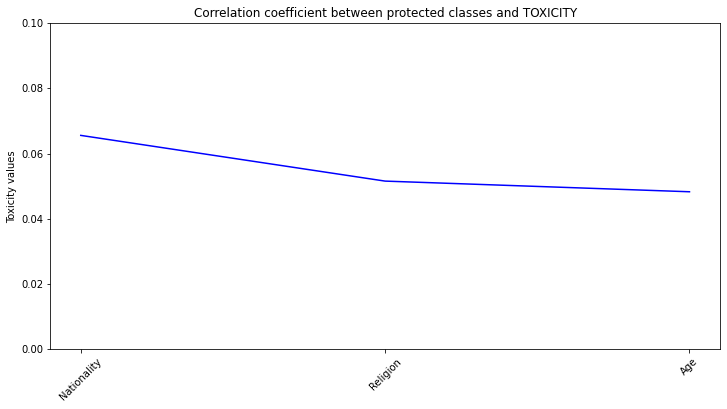

In [30]:
#PLOT CORRELATION COEFFICIENT GRAPH
# Data values
data = [nationality_coefficient, religion_coefficient, age_coefficient]

# Labels for x-axis
x_labels = ['Nationality', 'Religion', 'Age']

# Set plot parameters
plt.figure(figsize=(12,6))
plt.plot(data, color='blue')
plt.title('Correlation coefficient between protected classes and TOXICITY')
plt.ylim([0, 0.1])
plt.xticks(rotation=45)
plt.xticks(range(len(x_labels)), x_labels)
plt.ylabel('Toxicity values')

# Show plot
plt.show()

In [31]:
#TEST CODE SEGMENT
df2_4 = df2.copy()

# Create a correlation matrix
correlation_matrix = df2_4.iloc[:, :51].corrwith(df['TOXICITY'])
print(correlation_matrix)


Wiki_ID             0.047838
TOXICITY            1.000000
lesbian             0.103643
gay                 0.101454
bisexual            0.113546
transgender         0.104297
trans               0.076101
queer               0.138948
lgbt                0.068288
lgbtq               0.073180
homosexual          0.104763
straight            0.077735
heterosexual        0.073180
male                0.078398
female              0.083017
nonbinary           0.073180
african             0.087934
african american    0.066818
black               0.090270
white               0.076996
european            0.050863
hispanic            0.085582
latino              0.073180
latina              0.073180
latinx              0.073180
mexican             0.077792
canadian            0.054243
american            0.096722
asian               0.060263
indian              0.060655
middle eastern      0.048088
chinese             0.067510
japanese            0.070008
christian           0.075156
muslim        

##Step 4: 
Using your reduced data set (from the first task in Step 3), calculate the population mean and population standard deviation of TOXICITY. What is the range of values around the mean that includes 95% of TOXICITY? Run the random sampling method using 10% and 60% of the data. For each, what is the mean, standard deviation, and margin of error? Note: Although, for this and the following questions, TOXICITY may/may not follow a normal distribution, feel free to use the methods discussed in the lecture (i.e. it is not expected for you to explore new methods).

In [73]:
# Calculate the mean and standard deviation of the TOXICITY column
toxicity_mean = df3['TOXICITY'].mean()
toxicity_std = df3['TOXICITY'].std()

print("Mean toxicity value:", toxicity_mean)
print("Standard deviation of toxicity values:", toxicity_std)

# Calculate the 95% of the mean value of TOXICITY
#toxicity_mean_95 = np.percentile(df['TOXICITY'], 95)
toxicity_mean_95 = 0.95 * toxicity_mean
toxicity_mean_95_value = toxicity_mean - toxicity_mean_95
print("95% of mean toxicity value: + or -",toxicity_mean_95_value)


# Calculate 95% confidence interval
ci_95 = 1.96 * toxicity_std / np.sqrt(len(df))
ci_low = toxicity_mean - ci_95
ci_high = toxicity_mean + ci_95

print("Mean TOXICITY:", toxicity_mean)
print("Standard deviation of TOXICITY:", toxicity_std)
print("95% confidence interval for mean TOXICITY: ({:.2f}, {:.2f})".format(ci_low, ci_high))


Mean toxicity value: 0.550101802360502
Standard deviation of toxicity values: 0.3618524648767355
95% of mean toxicity value: + or - 0.027505090118025155
Mean TOXICITY: 0.550101802360502
Standard deviation of TOXICITY: 0.3618524648767355
95% confidence interval for mean TOXICITY: (0.55, 0.55)


In [33]:
# Random sampling using 60% of the dataset to create a reduced dataset

part_60 = df3.sample(frac = 0.6)
 
#View the reduced 60% of the DataFrame
part_60

# calculate mean and standard deviation of TOXICITY column in the reduced dataset (60% of dataframe)
mean_toxicity_60 = np.mean(part_60['TOXICITY'])
std_toxicity_60 = np.std(part_60['TOXICITY'])

# specify confidence level and sample size
confidence_level1 = 0.95
sample_size1 = 100

# calculate margin of error using t-distribution
t = stats.t.ppf((1 + confidence_level1) / 2, sample_size1 - 1)
margin_of_error_60 = t * std_toxicity_60 / np.sqrt(sample_size1)

print("Mean TOXICITY for 60% dataset:", mean_toxicity_60)
print("Standard deviation of TOXICITY for 60% dataset:", std_toxicity_60)
print("Margin of error for mean TOXICITY for 60% dataset:", margin_of_error_60)

Mean TOXICITY for 60% dataset: 0.5491097616678776
Standard deviation of TOXICITY for 60% dataset: 0.3623155746079439
Margin of error for mean TOXICITY for 60% dataset: 0.07189127049326911


In [34]:
#View the reduced 60% of the DataFrame
part_60

,Wiki_ID,TOXICITY,lesbian,gay,bisexual,transgender,trans,queer,lgbt,lgbtq,...,older,young,younger,teenage,millenial,middle aged,elderly,blind,deaf,paralyzed
25479,25479,0.802127,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
55328,55328,0.887117,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
26263,26263,0.607964,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
38818,38818,0.128213,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4144,4144,0.014476,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51136,51136,0.972411,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18583,18583,0.009379,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
50670,50670,0.243642,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11271,11271,0.978232,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [35]:
# Random sampling using 10% of the dataset to create a reduced dataset

part_10 = df3.sample(frac = 0.1)
 

#View the reduced 10% of the DataFrame
part_10

# calculate mean and standard deviation of TOXICITY column in the reduced dataset (10% of dataframe)
mean_toxicity_10 = np.mean(part_10['TOXICITY'])
std_toxicity_10 = np.std(part_10['TOXICITY'])

# specify confidence level and sample size
confidence_level2 = 0.95
sample_size2 = 100

# calculate margin of error using t-distribution
m = stats.t.ppf((1 + confidence_level2) / 2, sample_size2 - 1)
margin_of_error_10 = m * std_toxicity_10 / np.sqrt(sample_size2)

print("Mean TOXICITY of 10% dataset:", mean_toxicity_10)
print("Standard deviation of TOXICITY of 10% dataset:", std_toxicity_10)
print("Margin of error for mean TOXICITY for 10% dataset:", margin_of_error_10)

Mean TOXICITY of 10% dataset: 0.5513992054602378
Standard deviation of TOXICITY of 10% dataset: 0.3626727765933982
Margin of error for mean TOXICITY for 10% dataset: 0.07196214711673421


In [36]:
#View the reduced 10% of the DataFrame
part_10

,Wiki_ID,TOXICITY,lesbian,gay,bisexual,transgender,trans,queer,lgbt,lgbtq,...,older,young,younger,teenage,millenial,middle aged,elderly,blind,deaf,paralyzed
68514,68514,0.713349,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
24647,24647,0.859699,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
22507,22507,0.707107,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
25554,25554,0.941991,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19677,19677,0.952435,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26004,26004,0.115016,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51130,51130,0.119567,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9252,9252,0.187821,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12334,12334,0.170349,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [74]:

table2 = [
    ['Data', 'Dataset Size', 'Mean', 'Standard Deviation', '95% range of data', 'Margin of Error'],
    ['TOXICITY', len(df2), toxicity_mean, toxicity_std, toxicity_mean_95_value, ''],
    ['60% random sample of TOXICITY', len(part_60), mean_toxicity_60, std_toxicity_60, '', margin_of_error_60],
    ['10% random sample of TOXICITY', len(part_10), mean_toxicity_10, std_toxicity_10, '', margin_of_error_10]
]

print(tabulate(table2, headers='firstrow', tablefmt='grid'))


+-------------------------------+----------------+----------+----------------------+----------------------+---------------------+
| Data                          |   Dataset Size |     Mean |   Standard Deviation | 95% range of data    | Margin of Error     |
+===============================+================+==========+======================+======================+=====================+
| TOXICITY                      |          75700 | 0.550102 |             0.361852 | 0.027505090118025155 |                     |
+-------------------------------+----------------+----------+----------------------+----------------------+---------------------+
| 60% random sample of TOXICITY |          45420 | 0.54911  |             0.362316 |                      | 0.07189127049326911 |
+-------------------------------+----------------+----------+----------------------+----------------------+---------------------+
| 10% random sample of TOXICITY |           7570 | 0.551399 |             0.362673 |      

##Step 5: 
Using your reduced data set, calculate the mean and standard deviation of TOXICITY associated with the protected class category (Hint: TOXICITY values should only be included in the calculation when the associated protected class value is not FALSE). Run the random sampling method using 10% and 60% of the data. For each, what is the mean and standard deviation? Calculate MoE using each sample size and Indicate (yes/no) if the mean values lie within the associated population margin of error.

In [37]:
# drop rows with all false values
df4 = df4.drop(df4[~df4.any(axis=1)].index)

df4

,Wiki_ID,TOXICITY,lesbian,gay,bisexual,transgender,trans,queer,lgbt,lgbtq,...,older,young,younger,teenage,millenial,middle aged,elderly,blind,deaf,paralyzed
0,0,0.096492,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,0.017991,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,0.150298,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,0.065861,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4,0.667166,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75695,75695,0.965560,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
75696,75696,0.881662,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
75697,75697,0.985873,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
75698,75698,0.729808,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [38]:
#Drop all columns except Wiki_ID, TOXICITY, paralyzed, blind and deaf
cols_to_keep = ['Wiki_ID', 'TOXICITY', 'paralyzed', 'blind', 'deaf']
df4 = df4[cols_to_keep]

#view reduced dataframe
df4

,Wiki_ID,TOXICITY,paralyzed,blind,deaf
0,0,0.096492,False,False,False
1,1,0.017991,False,False,False
2,2,0.150298,False,False,False
3,3,0.065861,False,False,False
4,4,0.667166,False,False,False
...,...,...,...,...,...
75695,75695,0.965560,False,False,False
75696,75696,0.881662,False,False,False
75697,75697,0.985873,False,False,False
75698,75698,0.729808,False,False,False


In [39]:
# map integers to boolean values for each protected class variable column
df4['blind'] = df4['blind'].map({False: 0, True: 1}).astype(int)
df4['deaf'] = df4['deaf'].map({False: 0, True: 1}).astype(int)
df4['paralyzed'] = df4['paralyzed'].map({False: 0, True: 1}).astype(int)

#View dataframe
df4

<ipython-input-39-16a43dc6e875>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['blind'] = df4['blind'].map({False: 0, True: 1}).astype(int)
<ipython-input-39-16a43dc6e875>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['deaf'] = df4['deaf'].map({False: 0, True: 1}).astype(int)
<ipython-input-39-16a43dc6e875>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,Wiki_ID,TOXICITY,paralyzed,blind,deaf
0,0,0.096492,0,0,0
1,1,0.017991,0,0,0
2,2,0.150298,0,0,0
3,3,0.065861,0,0,0
4,4,0.667166,0,0,0
...,...,...,...,...,...
75695,75695,0.965560,0,0,0
75696,75696,0.881662,0,0,0
75697,75697,0.985873,0,0,0
75698,75698,0.729808,0,0,0


In [40]:
#Map the toxicity values to replace the 'true' values for the protected class variables and set 'false' values to 0
df4['blind'] = df4.apply(lambda x: x['TOXICITY'] if x['blind'] else 0, axis=1)
df4['deaf'] = df4.apply(lambda x: x['TOXICITY'] if x['deaf'] else 0, axis=1)
df4['paralyzed'] = df4.apply(lambda x: x['TOXICITY'] if x['paralyzed'] else 0, axis=1)

#view dataframe
df4

<ipython-input-40-8bf9bdb33953>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['blind'] = df4.apply(lambda x: x['TOXICITY'] if x['blind'] else 0, axis=1)
<ipython-input-40-8bf9bdb33953>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['deaf'] = df4.apply(lambda x: x['TOXICITY'] if x['deaf'] else 0, axis=1)
<ipython-input-40-8bf9bdb33953>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

,Wiki_ID,TOXICITY,paralyzed,blind,deaf
0,0,0.096492,0.0,0.0,0.0
1,1,0.017991,0.0,0.0,0.0
2,2,0.150298,0.0,0.0,0.0
3,3,0.065861,0.0,0.0,0.0
4,4,0.667166,0.0,0.0,0.0
...,...,...,...,...,...
75695,75695,0.965560,0.0,0.0,0.0
75696,75696,0.881662,0.0,0.0,0.0
75697,75697,0.985873,0.0,0.0,0.0
75698,75698,0.729808,0.0,0.0,0.0


In [41]:
#Again, drop all the rows that have 0 for deaf, blind and paralyzed columns

cols_to_check2 = ['blind', 'deaf', 'paralyzed']

# Filter out rows where all the specified columns are 0.0 or 0.00
df4 = df4.loc[(df4[cols_to_check2] != 0.00).any(axis=1)]
#df4 = df4.loc[(df4[cols_to_check2] != 0.0).any(axis=1) | (df4[cols_to_check2] != 0.00).any(axis=1)]

#view dataframe
df4

,Wiki_ID,TOXICITY,paralyzed,blind,deaf
16,16,0.307553,0.307553,0.000000,0.000000
28,28,0.136357,0.136357,0.000000,0.000000
32,32,0.523489,0.000000,0.523489,0.000000
53,53,0.491392,0.000000,0.000000,0.491392
109,109,0.512993,0.000000,0.512993,0.000000
...,...,...,...,...,...
75662,75662,0.967042,0.000000,0.000000,0.967042
75663,75663,0.971936,0.000000,0.971936,0.000000
75674,75674,0.978704,0.978704,0.000000,0.000000
75681,75681,0.634568,0.000000,0.000000,0.634568


In [42]:
# create an empty DataFrame with the desired column names
df_disability = pd.DataFrame(columns=['disability'])


# add the new columns to the original DataFrame
df4 = pd.concat([df4, df_disability], axis=1)

# calculate the averages for each row in the specified columns and insert them into the new disability column
df4['disability'] = df4[['blind', 'deaf', 'paralyzed']].mean(axis=1)

# View the modified DataFrame
df4


,Wiki_ID,TOXICITY,paralyzed,blind,deaf,disability
16,16,0.307553,0.307553,0.000000,0.000000,0.102518
28,28,0.136357,0.136357,0.000000,0.000000,0.045452
32,32,0.523489,0.000000,0.523489,0.000000,0.174496
53,53,0.491392,0.000000,0.000000,0.491392,0.163797
109,109,0.512993,0.000000,0.512993,0.000000,0.170998
...,...,...,...,...,...,...
75662,75662,0.967042,0.000000,0.000000,0.967042,0.322347
75663,75663,0.971936,0.000000,0.971936,0.000000,0.323979
75674,75674,0.978704,0.978704,0.000000,0.000000,0.326235
75681,75681,0.634568,0.000000,0.000000,0.634568,0.211523


In [43]:
# Calculate the mean and standard deviation of TOXICITY associated with disability protected class group

disability_mean = df4['disability'].mean()
disability_std = df4['disability'].std()

#Print the values for mean and standard deviation of TOXICITY associated with disability protected class group
print("Mean of TOXICITY associated with 'Disability' protected class group:", disability_mean)
print("Standard deviation of TOXICITY associated with 'Disability' protected class group:", disability_std)

Mean of TOXICITY associated with 'Disability' protected class group: 0.19413890609591955
Standard deviation of TOXICITY associated with 'Disability' protected class group: 0.11165599899457024


In [75]:
table3 = [
    ['Item associated with disability protected class group', 'Mean', 'Standard Deviation'],
    ['TOXICITY', disability_mean, disability_std]
]

print(tabulate(table3, headers='firstrow', tablefmt='grid'))

+---------------------------------------------------------+----------+----------------------+
| Item associated with disability protected class group   |     Mean |   Standard Deviation |
+=========================================================+==========+======================+
| TOXICITY                                                | 0.194139 |             0.111656 |
+---------------------------------------------------------+----------+----------------------+


In [44]:
# Random sampling using 60% of the disability dataset to create a reduced dataset

disability_part_60 = df4.sample(frac = 0.6)
 
#View the reduced 60% of the DataFrame
disability_part_60

# calculate mean and standard deviation of TOXICITY associated with disability class in the reduced dataset (60% of dataframe)
disability_mean_toxicity_60 = np.mean(disability_part_60['disability'])
disability_std_toxicity_60 = np.std(disability_part_60['disability'])

# specify confidence level and sample size
confidence_level3 = 0.95
sample_size3 = 100

# calculate margin of error using t-distribution
k = stats.t.ppf((1 + confidence_level3) / 2, sample_size3 - 1)
disability_margin_of_error_60 = k * disability_std_toxicity_60 / np.sqrt(sample_size3)

print("Mean TOXICITY associated with disability class for 60% dataset:", disability_mean_toxicity_60)
print("Standard deviation of TOXICITY associated with disability class for 60% dataset:", disability_std_toxicity_60)
print("Margin of error for mean of TOXICITY associated with disability class for 60% dataset:", disability_margin_of_error_60)

Mean TOXICITY associated with disability class for 60% dataset: 0.19234437980477062
Standard deviation of TOXICITY associated with disability class for 60% dataset: 0.11189929720526402
Margin of error for mean of TOXICITY associated with disability class for 60% dataset: 0.022203248237659304


In [45]:
# Random sampling using 10% of the disability dataset to create a reduced dataset

disability_part_10 = df4.sample(frac = 0.1)
 
#View the reduced 10% of the DataFrame
disability_part_10

# calculate mean and standard deviation of TOXICITY associated with disability class in the reduced dataset (10% of dataframe)
disability_mean_toxicity_10 = disability_part_10['disability'].mean()
disability_std_toxicity_10 = disability_part_10['disability'].std()

#disability_mean_toxicity_10 = np.mean(disability_part_10['disability'])
#disability_std_toxicity_10 = np.std(disability_part_10['disability'])

# specify confidence level and sample size
confidence_level4 = 0.95
sample_size4 = 100

# calculate margin of error using t-distribution
l = stats.t.ppf((1 + confidence_level4) / 2, sample_size4 - 1)
disability_margin_of_error_10 = l * disability_std_toxicity_10 / np.sqrt(sample_size4)

print("Mean TOXICITY associated with disability class for 10% dataset:", disability_mean_toxicity_10)
print("Standard deviation of TOXICITY associated with disability class for 10% dataset:", disability_std_toxicity_10)
print("Margin of error for mean of TOXICITY associated with disability class for 10% dataset:", disability_margin_of_error_10)


Mean TOXICITY associated with disability class for 10% dataset: 0.1920155738678414
Standard deviation of TOXICITY associated with disability class for 10% dataset: 0.1125710865657754
Margin of error for mean of TOXICITY associated with disability class for 10% dataset: 0.022336545821356288


In [77]:
table4 = [
    ['Item associated with TOXICITY (Disability)', 'Mean', 'Standard Deviation', 'Margin of Error', 'Mean within Margin of Error range?'],
    ['60% random sample of dataset', disability_mean_toxicity_60, disability_std_toxicity_60, disability_margin_of_error_60, 'Yes'],
    ['10% random sample of dataset', disability_mean_toxicity_10, disability_std_toxicity_10, disability_margin_of_error_10, 'Yes']
]

print(tabulate(table4, headers='firstrow', tablefmt='grid'))

+----------------------------------------------+----------+----------------------+-------------------+--------------------------------------+
| Item associated with TOXICITY (Disability)   |     Mean |   Standard Deviation |   Margin of Error | Mean within Margin of Error range?   |
+==============================================+==========+======================+===================+======================================+
| 60% random sample of dataset                 | 0.192344 |             0.111899 |         0.0222032 | Yes                                  |
+----------------------------------------------+----------+----------------------+-------------------+--------------------------------------+
| 10% random sample of dataset                 | 0.192016 |             0.112571 |         0.0223365 | Yes                                  |
+----------------------------------------------+----------+----------------------+-------------------+--------------------------------------+


##Step 6: 
Using your reduced data set, calculate the mean and standard deviation of TOXICITY associated with each subgroup that is a member of the protected class category (Hint: TOXICITY values should only be included in the calculation when the associated protected class value is not FALSE). Run the random sampling method using 10% and 60% of the data. For each subgroup, what is the mean and standard deviation? Calculate MoE using each sample size and indicate (yes/no) if the mean values lie within the associated population margin of error.

In [46]:
#view dataframe
df4

,Wiki_ID,TOXICITY,paralyzed,blind,deaf,disability
16,16,0.307553,0.307553,0.000000,0.000000,0.102518
28,28,0.136357,0.136357,0.000000,0.000000,0.045452
32,32,0.523489,0.000000,0.523489,0.000000,0.174496
53,53,0.491392,0.000000,0.000000,0.491392,0.163797
109,109,0.512993,0.000000,0.512993,0.000000,0.170998
...,...,...,...,...,...,...
75662,75662,0.967042,0.000000,0.000000,0.967042,0.322347
75663,75663,0.971936,0.000000,0.971936,0.000000,0.323979
75674,75674,0.978704,0.978704,0.000000,0.000000,0.326235
75681,75681,0.634568,0.000000,0.000000,0.634568,0.211523


In [47]:
#make three copies of the dataframe being used
paralyzed_df = df4.copy()
blind_df = df4.copy()
deaf_df = df4.copy()


In [48]:
#For the paralyzed dataframe, drop all columns except Wiki_ID, TOXICITY and paralyzed
cols_to_keep2 = ['Wiki_ID', 'TOXICITY', 'paralyzed']
paralyzed_df = df4[cols_to_keep2]

#view dataframe
paralyzed_df

,Wiki_ID,TOXICITY,paralyzed
16,16,0.307553,0.307553
28,28,0.136357,0.136357
32,32,0.523489,0.000000
53,53,0.491392,0.000000
109,109,0.512993,0.000000
...,...,...,...
75662,75662,0.967042,0.000000
75663,75663,0.971936,0.000000
75674,75674,0.978704,0.978704
75681,75681,0.634568,0.000000


In [49]:
#For the paralyzed dataframe, drop all the rows that have 0 for paralyzed columns
cols_to_check3 = ['paralyzed']

# Filter out rows where all the specified columns are 0.000000
paralyzed_df = paralyzed_df.loc[(paralyzed_df[cols_to_check3] != 0.000000).any(axis=1)]

#view dataframe
paralyzed_df

,Wiki_ID,TOXICITY,paralyzed
16,16,0.307553,0.307553
28,28,0.136357,0.136357
155,155,0.491392,0.491392
158,158,0.322415,0.322415
254,254,0.581286,0.581286
...,...,...,...
75409,75409,0.675607,0.675607
75415,75415,0.962669,0.962669
75546,75546,0.963676,0.963676
75611,75611,0.221665,0.221665


In [50]:
# Calculate the mean and standard deviation of TOXICITY associated with paralyzed subgroup of protected class

paralyzed_mean = paralyzed_df['paralyzed'].mean()
paralyzed_std = paralyzed_df['paralyzed'].std()

#Print the values for mean and standard deviation of TOXICITY associated with paralyzed subgroup of protected class
print("Mean of TOXICITY associated with 'Paralyzed' subgroup of protected class:", paralyzed_mean)
print("Standard deviation of TOXICITY associated with 'Paralyzed' subgroup of protected class:", paralyzed_std)


Mean of TOXICITY associated with 'Paralyzed' subgroup of protected class: 0.5551644657826948
Standard deviation of TOXICITY associated with 'Paralyzed' subgroup of protected class: 0.34454709411896717


In [78]:
table5 = [
    ['Paralyzed - subgroup of disability protected class', 'Mean', 'Standard Deviation'],
    ['TOXICITY', paralyzed_mean, paralyzed_std]
]

print(tabulate(table5, headers='firstrow', tablefmt='grid'))

+------------------------------------------------------+----------+----------------------+
| Paralyzed - subgroup of disability protected class   |     Mean |   Standard Deviation |
+======================================================+==========+======================+
| TOXICITY                                             | 0.555164 |             0.344547 |
+------------------------------------------------------+----------+----------------------+


In [51]:
# Random sampling using 60% of the paralyzed dataset to create a reduced dataset
paralyzed_part_60 = paralyzed_df.sample(frac = 0.6)
 
#View the reduced 60% of the DataFrame
paralyzed_part_60

# calculate mean and standard deviation of TOXICITY associated with paralyzed subgroup of the protected class in the reduced dataset (60% of dataframe)
#paralyzed_mean_60 = np.mean(paralyzed_part_60['paralyzed'])
#paralyzed_std_60 = np.std(paralyzed_part_60['paralyzed'])

paralyzed_mean_60 = paralyzed_part_60['paralyzed'].mean()
paralyzed_std_60 = paralyzed_part_60['paralyzed'].std()

# specify confidence level and sample size
confidence_level5 = 0.95
sample_size5 = 100

# calculate margin of error using t-distribution
p = stats.t.ppf((1 + confidence_level5) / 2, sample_size5 - 1)
paralyzed_margin_of_error_60 = p * paralyzed_std_60 / np.sqrt(sample_size5)

print("Mean TOXICITY associated with paralyzed subgroup for 60% dataset:", paralyzed_mean_60)
print("Standard deviation of TOXICITY associated with paralyzed subgroup for 60% dataset:", paralyzed_std_60)
print("Margin of error for mean of TOXICITY associated with paralyzed subgroup for 60% dataset:", paralyzed_margin_of_error_60)


Mean TOXICITY associated with paralyzed subgroup for 60% dataset: 0.5538164146563876
Standard deviation of TOXICITY associated with paralyzed subgroup for 60% dataset: 0.3411909648072395
Margin of error for mean of TOXICITY associated with paralyzed subgroup for 60% dataset: 0.0676996896072127


In [52]:
# Random sampling using 10% of the paralyzed dataset to create a reduced dataset
paralyzed_part_10 = paralyzed_df.sample(frac = 0.1)
 
#View the reduced 10% of the DataFrame
paralyzed_part_10

# calculate mean and standard deviation of TOXICITY associated with paralyzed subgroup of the protected class in the reduced dataset (10% of dataframe)
#paralyzed_mean_10 = np.mean(paralyzed_part_10['paralyzed'])
#paralyzed_std_10 = np.std(paralyzed_part_10['paralyzed'])

paralyzed_mean_10 = paralyzed_part_10['paralyzed'].mean()
paralyzed_std_10 = paralyzed_part_10['paralyzed'].std()

# specify confidence level and sample size
confidence_level6 = 0.95
sample_size6 = 100

# calculate margin of error using t-distribution
r = stats.t.ppf((1 + confidence_level6) / 2, sample_size6 - 1)
paralyzed_margin_of_error_10 = r * paralyzed_std_10 / np.sqrt(sample_size6)

print("Mean TOXICITY associated with paralyzed subgroup for 10% dataset:", paralyzed_mean_10)
print("Standard deviation of TOXICITY associated with paralyzed subgroup for 10% dataset:", paralyzed_std_10)
print("Margin of error for mean of TOXICITY associated with paralyzed subgroup for 10% dataset:", paralyzed_margin_of_error_10)


Mean TOXICITY associated with paralyzed subgroup for 10% dataset: 0.5808522429801325
Standard deviation of TOXICITY associated with paralyzed subgroup for 10% dataset: 0.3444306818699541
Margin of error for mean of TOXICITY associated with paralyzed subgroup for 10% dataset: 0.06834251975860572


In [79]:
table6 = [
    ['Paralyzed - subgroup of disability group', 'Mean', 'Standard Deviation', 'Margin of Error', 'Mean within Margin of Error range?'],
    ['60% random sample of dataset', paralyzed_mean_60, paralyzed_std_60, paralyzed_margin_of_error_60, 'Yes'],
    ['10% random sample of dataset', paralyzed_mean_10, paralyzed_std_10, paralyzed_margin_of_error_10, 'Yes']
]

print(tabulate(table6, headers='firstrow', tablefmt='grid'))

+--------------------------------------------+----------+----------------------+-------------------+--------------------------------------+
| Paralyzed - subgroup of disability group   |     Mean |   Standard Deviation |   Margin of Error | Mean within Margin of Error range?   |
+============================================+==========+======================+===================+======================================+
| 60% random sample of dataset               | 0.553816 |             0.341191 |         0.0676997 | Yes                                  |
+--------------------------------------------+----------+----------------------+-------------------+--------------------------------------+
| 10% random sample of dataset               | 0.580852 |             0.344431 |         0.0683425 | Yes                                  |
+--------------------------------------------+----------+----------------------+-------------------+--------------------------------------+


In [53]:
#For the blind dataframe, drop all columns except Wiki_ID, TOXICITY and blind
cols_to_keep3 = ['Wiki_ID', 'TOXICITY', 'blind']
blind_df = df4[cols_to_keep3]

#view dataframe
blind_df

,Wiki_ID,TOXICITY,blind
16,16,0.307553,0.000000
28,28,0.136357,0.000000
32,32,0.523489,0.523489
53,53,0.491392,0.000000
109,109,0.512993,0.512993
...,...,...,...
75662,75662,0.967042,0.000000
75663,75663,0.971936,0.971936
75674,75674,0.978704,0.000000
75681,75681,0.634568,0.000000


In [54]:
#For the blind dataframe, drop all the rows that have 0 for blind columns
cols_to_check4 = ['blind']

# Filter out rows where all the specified columns are 0.000000
blind_df = blind_df.loc[(blind_df[cols_to_check4] != 0.000000).any(axis=1)]

#view dataframe
blind_df

,Wiki_ID,TOXICITY,blind
32,32,0.523489,0.523489
109,109,0.512993,0.512993
163,163,0.554385,0.554385
259,259,0.818626,0.818626
295,295,0.375661,0.375661
...,...,...,...
75494,75494,0.984928,0.984928
75529,75529,0.973146,0.973146
75624,75624,0.895399,0.895399
75663,75663,0.971936,0.971936


In [55]:
# Calculate the mean and standard deviation of TOXICITY associated with blind subgroup of protected class

blind_mean = blind_df['blind'].mean()
blind_std = blind_df['blind'].std()

#Print the values for mean and standard deviation of TOXICITY associated with blind subgroup of protected class
print("Mean of TOXICITY associated with 'Blind' subgroup of protected class:", blind_mean)
print("Standard deviation of TOXICITY associated with 'Blind' subgroup of protected class:", blind_std)


Mean of TOXICITY associated with 'Blind' subgroup of protected class: 0.6369212232978864
Standard deviation of TOXICITY associated with 'Blind' subgroup of protected class: 0.30801710889824685


In [80]:
table7 = [
    ['Blind - subgroup of disability protected class', 'Mean', 'Standard Deviation'],
    ['TOXICITY', blind_mean, blind_std]
]

print(tabulate(table7, headers='firstrow', tablefmt='grid'))

+--------------------------------------------------+----------+----------------------+
| Blind - subgroup of disability protected class   |     Mean |   Standard Deviation |
+==================================================+==========+======================+
| TOXICITY                                         | 0.636921 |             0.308017 |
+--------------------------------------------------+----------+----------------------+


In [56]:
# Random sampling using 60% of the blind dataset to create a reduced dataset
blind_part_60 = blind_df.sample(frac = 0.6)
 
#View the reduced 60% of the DataFrame
blind_part_60

# calculate mean and standard deviation of TOXICITY associated with blind subgroup of the protected class in the reduced dataset (60% of dataframe)
#blind_mean_60 = np.mean(blind_part_60['paralyzed'])
#blind_std_60 = np.std(blind_part_60['paralyzed'])

blind_mean_60 = blind_part_60['blind'].mean()
blind_std_60 = blind_part_60['blind'].std()

# specify confidence level and sample size
confidence_level7 = 0.95
sample_size7 = 100

# calculate margin of error using t-distribution
b = stats.t.ppf((1 + confidence_level7) / 2, sample_size7 - 1)
blind_margin_of_error_60 = b * blind_std_60 / np.sqrt(sample_size7)

print("Mean TOXICITY associated with blind subgroup for 60% dataset:", blind_mean_60)
print("Standard deviation of TOXICITY associated with blind subgroup for 60% dataset:", blind_std_60)
print("Margin of error for mean of TOXICITY associated with blind subgroup for 60% dataset:", blind_margin_of_error_60)


Mean TOXICITY associated with blind subgroup for 60% dataset: 0.6467548133006606
Standard deviation of TOXICITY associated with blind subgroup for 60% dataset: 0.30313688225073787
Margin of error for mean of TOXICITY associated with blind subgroup for 60% dataset: 0.06014893403894056


In [57]:
# Random sampling using 10% of the blind dataset to create a reduced dataset
blind_part_10 = blind_df.sample(frac = 0.1)
 
#View the reduced 10% of the DataFrame
blind_part_10

# calculate mean and standard deviation of TOXICITY associated with blind subgroup of the protected class in the reduced dataset (10% of dataframe)
#blind_mean_10 = np.mean(blind_part_10['blind'])
#blind_std_10 = np.std(blind_part_10['blind'])

blind_mean_10 = blind_part_10['blind'].mean()
blind_std_10 = blind_part_10['blind'].std()

# specify confidence level and sample size
confidence_level8 = 0.95
sample_size8 = 100

# calculate margin of error using t-distribution
c = stats.t.ppf((1 + confidence_level8) / 2, sample_size8 - 1)
blind_margin_of_error_10 = c * blind_std_10 / np.sqrt(sample_size8)

print("Mean TOXICITY associated with blind subgroup for 10% dataset:", blind_mean_10)
print("Standard deviation of TOXICITY associated with blind subgroup for 10% dataset:", blind_std_10)
print("Margin of error for mean of TOXICITY associated with blind subgroup for 10% dataset:", blind_margin_of_error_10)


Mean TOXICITY associated with blind subgroup for 10% dataset: 0.6444786492119206
Standard deviation of TOXICITY associated with blind subgroup for 10% dataset: 0.3015430421200196
Margin of error for mean of TOXICITY associated with blind subgroup for 10% dataset: 0.059832681578403955


In [81]:
table8 = [
    ['Blind - subgroup of disability group', 'Mean', 'Standard Deviation', 'Margin of Error', 'Mean within Margin of Error range?'],
    ['60% random sample of dataset', blind_mean_60, blind_std_60, blind_margin_of_error_60, 'Yes'],
    ['10% random sample of dataset', blind_mean_10, blind_std_10, blind_margin_of_error_10, 'Yes']
]

print(tabulate(table8, headers='firstrow', tablefmt='grid'))

+----------------------------------------+----------+----------------------+-------------------+--------------------------------------+
| Blind - subgroup of disability group   |     Mean |   Standard Deviation |   Margin of Error | Mean within Margin of Error range?   |
+========================================+==========+======================+===================+======================================+
| 60% random sample of dataset           | 0.646755 |             0.303137 |         0.0601489 | Yes                                  |
+----------------------------------------+----------+----------------------+-------------------+--------------------------------------+
| 10% random sample of dataset           | 0.644479 |             0.301543 |         0.0598327 | Yes                                  |
+----------------------------------------+----------+----------------------+-------------------+--------------------------------------+


In [58]:
#For the deaf dataframe, drop all columns except Wiki_ID, TOXICITY and deaf
cols_to_keep4 = ['Wiki_ID', 'TOXICITY', 'deaf']
deaf_df = df4[cols_to_keep4]

#view dataframe
deaf_df

,Wiki_ID,TOXICITY,deaf
16,16,0.307553,0.000000
28,28,0.136357,0.000000
32,32,0.523489,0.000000
53,53,0.491392,0.491392
109,109,0.512993,0.000000
...,...,...,...
75662,75662,0.967042,0.967042
75663,75663,0.971936,0.000000
75674,75674,0.978704,0.000000
75681,75681,0.634568,0.634568


In [59]:
#For the deaf dataframe, drop all the rows that have 0 for deaf columns
cols_to_check5 = ['deaf']

# Filter out rows where all the specified columns are 0.000000
deaf_df = deaf_df.loc[(deaf_df[cols_to_check5] != 0.000000).any(axis=1)]

#view dataframe
deaf_df

,Wiki_ID,TOXICITY,deaf
53,53,0.491392,0.491392
122,122,0.136357,0.136357
135,135,0.307553,0.307553
321,321,0.322415,0.322415
349,349,0.109613,0.109613
...,...,...,...
75590,75590,0.972360,0.972360
75607,75607,0.698803,0.698803
75652,75652,0.962669,0.962669
75662,75662,0.967042,0.967042


In [60]:
# Calculate the mean and standard deviation of TOXICITY associated with deaf subgroup of protected class

deaf_mean = deaf_df['deaf'].mean()
deaf_std = deaf_df['deaf'].std()

#Print the values for mean and standard deviation of TOXICITY associated with deaf subgroup of protected class
print("Mean of TOXICITY associated with 'Deaf' subgroup of protected class:", deaf_mean)
print("Standard deviation of TOXICITY associated with 'Deaf' subgroup of protected class:", deaf_std)


Mean of TOXICITY associated with 'Deaf' subgroup of protected class: 0.5551644657826948
Standard deviation of TOXICITY associated with 'Deaf' subgroup of protected class: 0.34454709411896717


In [83]:
table9 = [
    ['Deaf - subgroup of disability protected class', 'Mean', 'Standard Deviation'],
    ['TOXICITY', deaf_mean, deaf_std]
]

print(tabulate(table9, headers='firstrow', tablefmt='grid'))

+-------------------------------------------------+----------+----------------------+
| Deaf - subgroup of disability protected class   |     Mean |   Standard Deviation |
+=================================================+==========+======================+
| TOXICITY                                        | 0.555164 |             0.344547 |
+-------------------------------------------------+----------+----------------------+


In [61]:
# Random sampling using 60% of the deaf dataset to create a reduced dataset
deaf_part_60 = deaf_df.sample(frac = 0.6)
 
#View the reduced 60% of the DataFrame
deaf_part_60

# calculate mean and standard deviation of TOXICITY associated with deaf subgroup of the protected class in the reduced dataset (60% of dataframe)
#deaf_mean_60 = np.mean(deaf_part_60['deaf'])
#deaf_std_60 = np.std(deaf_part_60['deaf'])

deaf_mean_60 = deaf_part_60['deaf'].mean()
deaf_std_60 = deaf_part_60['deaf'].std()

# specify confidence level and sample size
confidence_level9 = 0.95
sample_size9 = 100

# calculate margin of error using t-distribution
d = stats.t.ppf((1 + confidence_level9) / 2, sample_size9 - 1)
deaf_margin_of_error_60 = d * deaf_std_60 / np.sqrt(sample_size9)

print("Mean TOXICITY associated with deaf subgroup for 60% dataset:", deaf_mean_60)
print("Standard deviation of TOXICITY associated with deaf subgroup for 60% dataset:", deaf_std_60)
print("Margin of error for mean of TOXICITY associated with deaf subgroup for 60% dataset:", deaf_margin_of_error_60)


Mean TOXICITY associated with deaf subgroup for 60% dataset: 0.5596201726354626
Standard deviation of TOXICITY associated with deaf subgroup for 60% dataset: 0.34082194349404965
Margin of error for mean of TOXICITY associated with deaf subgroup for 60% dataset: 0.06762646777270277


In [62]:
# Random sampling using 10% of the deaf dataset to create a reduced dataset
deaf_part_10 = deaf_df.sample(frac = 0.1)
 
#View the reduced 10% of the DataFrame
deaf_part_10

# calculate mean and standard deviation of TOXICITY associated with deaf subgroup of the protected class in the reduced dataset (10% of dataframe)
#deaf_mean_10 = np.mean(deaf_part_10['deaf'])
#deaf_std_10 = np.std(deaf_part_10['deaf'])

deaf_mean_10 = deaf_part_10['deaf'].mean()
deaf_std_10 = deaf_part_10['deaf'].std()

# specify confidence level and sample size
confidence_level10 = 0.95
sample_size10 = 100

# calculate margin of error using t-distribution
e = stats.t.ppf((1 + confidence_level10) / 2, sample_size10 - 1)
deaf_margin_of_error_10 = e * deaf_std_10 / np.sqrt(sample_size10)

print("Mean TOXICITY associated with deaf subgroup for 10% dataset:", deaf_mean_10)
print("Standard deviation of TOXICITY associated with deaf subgroup for 10% dataset:", deaf_std_10)
print("Margin of error for mean of TOXICITY associated with deaf subgroup for 10% dataset:", deaf_margin_of_error_10)

Mean TOXICITY associated with deaf subgroup for 10% dataset: 0.5563365027682118
Standard deviation of TOXICITY associated with deaf subgroup for 10% dataset: 0.34717683706481356
Margin of error for mean of TOXICITY associated with deaf subgroup for 10% dataset: 0.06888741652751709


In [84]:
table10 = [
    ['Deaf - subgroup of disability group', 'Mean', 'Standard Deviation', 'Margin of Error', 'Mean within Margin of Error range?'],
    ['60% random sample of dataset', deaf_mean_60, deaf_std_60, deaf_margin_of_error_60, 'Yes'],
    ['10% random sample of dataset', deaf_mean_10, deaf_std_10, deaf_margin_of_error_10, 'Yes']
]

print(tabulate(table10, headers='firstrow', tablefmt='grid'))

+---------------------------------------+----------+----------------------+-------------------+--------------------------------------+
| Deaf - subgroup of disability group   |     Mean |   Standard Deviation |   Margin of Error | Mean within Margin of Error range?   |
+=======================================+==========+======================+===================+======================================+
| 60% random sample of dataset          | 0.55962  |             0.340822 |         0.0676265 | Yes                                  |
+---------------------------------------+----------+----------------------+-------------------+--------------------------------------+
| 10% random sample of dataset          | 0.556337 |             0.347177 |         0.0688874 | Yes                                  |
+---------------------------------------+----------+----------------------+-------------------+--------------------------------------+


##Step 7: 
Plot (on one graph) - 1) the computed population mean/standard deviation (Step 4), (2) the computed mean/standard deviation for the protected class category (Step 5), and (3) the computed mean/standard deviation for each subgroup of the protected class category (Step 6). Which of the subgroups has the highest TOXICITY value? Which of the subgroups has the lowest TOXICITY value? Which of the subgroups has the largest difference in TOXICITY value when compared to the population mean? Does there seem to be any human bias in the data? Explain (in no more than 3-5 sentences).

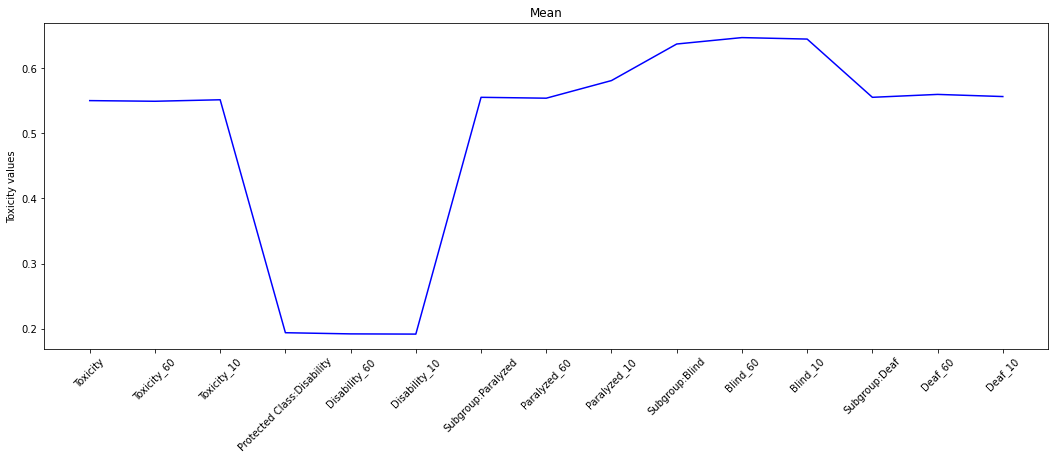

In [85]:
#PLOT MEAN GRAPH
# Data values
data = [toxicity_mean, mean_toxicity_60, mean_toxicity_10, disability_mean, disability_mean_toxicity_60, 
        disability_mean_toxicity_10, paralyzed_mean, paralyzed_mean_60, paralyzed_mean_10, blind_mean, 
        blind_mean_60, blind_mean_10, deaf_mean, deaf_mean_60, deaf_mean_10]

# Labels for x-axis
x_labels = ['Toxicity', 'Toxicity_60', 'Toxicity_10',
            'Protected Class:Disability', 'Disability_60', 'Disability_10',
            'Subgroup:Paralyzed', 'Paralyzed_60', 'Paralyzed_10',
            'Subgroup:Blind', 'Blind_60', 'Blind_10',
            'Subgroup:Deaf', 'Deaf_60', 'Deaf_10']

# Set plot parameters
plt.figure(figsize=(18,6))
plt.plot(data, color='blue')
plt.title('Mean')
plt.xticks(rotation=45)
plt.xticks(range(len(x_labels)), x_labels)
plt.ylabel('Toxicity values')

# Show plot
plt.show()

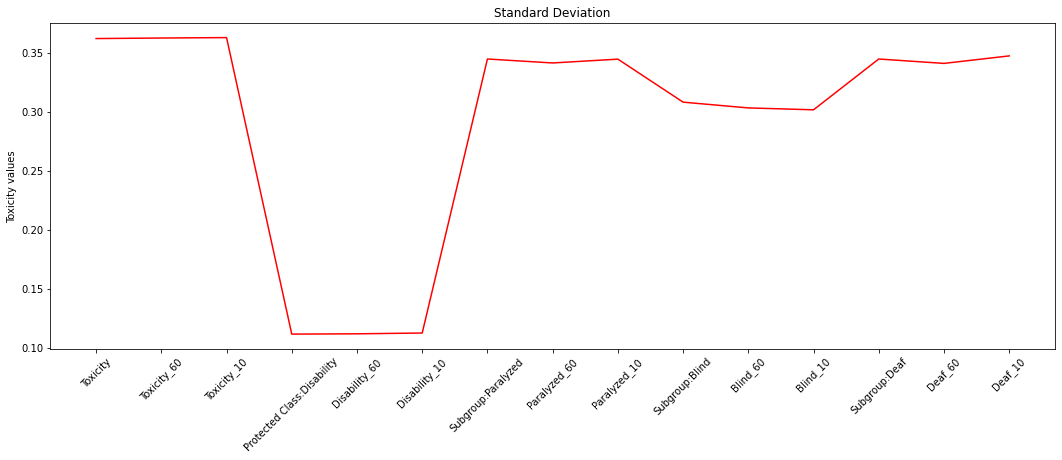

In [86]:
#PLOT STANDARD DEVIATION GRAPH
# Data values
data2 = [toxicity_std, std_toxicity_60, std_toxicity_10, disability_std, disability_std_toxicity_60, 
        disability_std_toxicity_10, paralyzed_std, paralyzed_std_60, paralyzed_std_10, blind_std, 
        blind_std_60, blind_std_10, deaf_std, deaf_std_60, deaf_std_10]

# Labels for x-axis
x_labels2 = ['Toxicity', 'Toxicity_60', 'Toxicity_10',
            'Protected Class:Disability', 'Disability_60', 'Disability_10',
            'Subgroup:Paralyzed', 'Paralyzed_60', 'Paralyzed_10',
            'Subgroup:Blind', 'Blind_60', 'Blind_10',
            'Subgroup:Deaf', 'Deaf_60', 'Deaf_10']

# Set plot parameters
plt.figure(figsize=(18,6))
plt.plot(data2, color='red')
plt.title('Standard Deviation')
plt.xticks(rotation=45)
plt.xticks(range(len(x_labels2)), x_labels2)
plt.ylabel('Toxicity values')


# Show plot
plt.show()

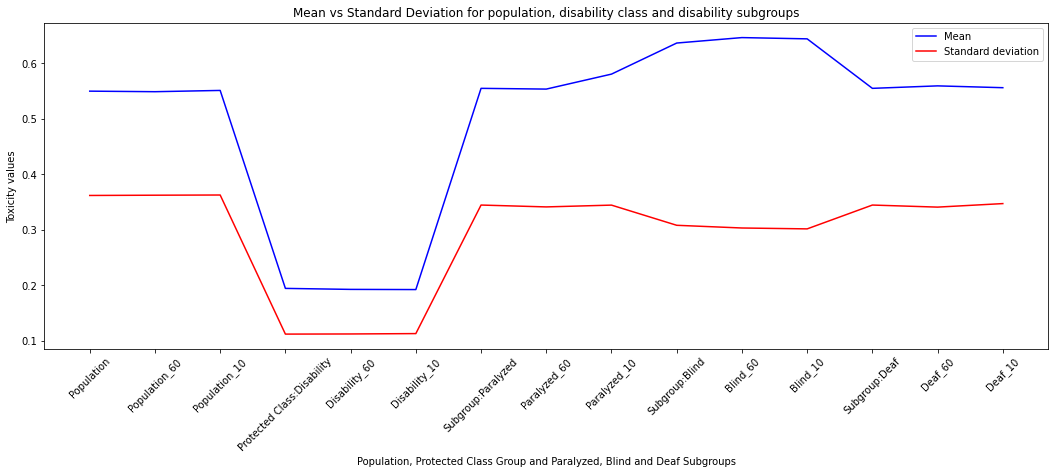

In [87]:
#COMBINED MEAN AND STANDARD DEVIATION LINE GRAPH

# Data values

mean_data = [toxicity_mean, mean_toxicity_60, mean_toxicity_10, disability_mean, disability_mean_toxicity_60, 
        disability_mean_toxicity_10, paralyzed_mean, paralyzed_mean_60, paralyzed_mean_10, blind_mean, 
        blind_mean_60, blind_mean_10, deaf_mean, deaf_mean_60, deaf_mean_10]

std_data = [toxicity_std, std_toxicity_60, std_toxicity_10, disability_std, disability_std_toxicity_60, 
        disability_std_toxicity_10, paralyzed_std, paralyzed_std_60, paralyzed_std_10, blind_std, 
        blind_std_60, blind_std_10, deaf_std, deaf_std_60, deaf_std_10]

# Data labels
x_labels = ['Population', 'Population_60', 'Population_10', 'Protected Class:Disability', 'Disability_60', 
            'Disability_10', 'Subgroup:Paralyzed', 'Paralyzed_60', 'Paralyzed_10', 'Subgroup:Blind', 
            'Blind_60', 'Blind_10', 'Subgroup:Deaf', 'Deaf_60', 'Deaf_10']

# Plotting
plt.figure(figsize=(18,6))
plt.plot(mean_data, color='blue', label='Mean')
plt.plot(std_data, color='red', label='Standard deviation')
plt.title('Mean vs Standard Deviation for population, disability class and disability subgroups')
plt.xlabel('Population, Protected Class Group and Paralyzed, Blind and Deaf Subgroups')
plt.xticks(range(len(x_labels)), x_labels, rotation=45)
plt.ylabel('Toxicity values')
plt.legend()
plt.show()
